# SVR, GridSearchCV
## Module import

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## GridSearchCV training and testing

In [3]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/8-splits/USD'

# Create DataFrames to store the results
mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Define the hyperparameter grid
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

offset = '30'

train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))

# Split the data into features and target
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]
            
# Initialize the SVR model
model = SVR(C=1, epsilon=0.001, kernel='rbf')

# Perform grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='r2',     # evaluation metric
    n_jobs=-1         # use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Print the results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R^2 score: {grid_search.best_score_:.3f}")

Best parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best R^2 score: -0.179


## Plot test set and prediction set

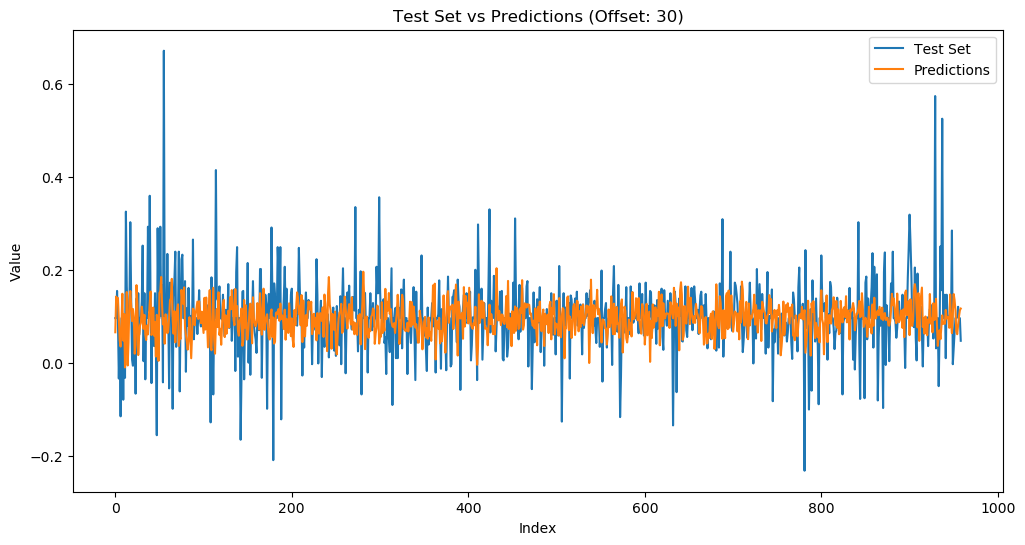

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Test Set')
plt.plot(y_pred, label='Predictions')
plt.title(f'Test Set vs Predictions (Offset: {offset})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()